dataset :
https://media.geeksforgeeks.org/wp-content/uploads/20250402171822919100/credit-card-dataset.zip

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.models import Sequential
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from keras.initializers import random_normal
from keras.constraints import max_norm
from keras.optimizers import SGD

In [14]:
df = pd.read_csv('/content/Credit_card.csv')
labels = pd.read_csv('/content/Credit_card_label.csv')

In [15]:
dep = 'Approved'

df[dep] = labels.label.astype(int)

df.loc[df[dep] == 1, 'Status'] = 'Approved'
df.loc[df[dep] == 0, 'Status'] = 'Declined'

In [17]:
cats = [
    'GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income',
    'EDUCATION', 'Marital_status', 'Housing_type', 'Mobile_phone',
    'Work_Phone', 'Phone', 'Type_Occupation', 'EMAIL_ID'
]

conts = [
    'CHILDREN', 'Family_Members', 'Annual_income',
    'Age', 'EmployedDaysOnly', 'UnemployedDaysOnly'
]
def proc_data():
    df['Age'] = -df.Birthday_count // 365
    df['EmployedDaysOnly'] = df.Employed_days.apply(lambda x: x if x > 0 else 0)
    df['UnemployedDaysOnly'] = df.Employed_days.apply(lambda x: abs(x) if x < 0 else 0)

    for cat in cats:
        df[cat] = pd.Categorical(df[cat])

    modes = df.mode().iloc[0]
    df.fillna(modes, inplace=True)

proc_data()

In [18]:
y.value_counts()

,count
Approved,
0,1373
1,175


In [19]:
X = df[cats + conts]
y = df[dep]
X_over, y_over = RandomOverSampler().fit_resample(X, y)

X_train, X_val, y_train, y_val = train_test_split(X_over, y_over, test_size=0.25)

In [20]:
X_train[cats] = X_train[cats].apply(lambda x: x.cat.codes)
X_val[cats] = X_val[cats].apply(lambda x: x.cat.codes)

In [22]:
model = Sequential()

In [23]:
model.add(Dense(10, activation='sigmoid', input_dim=18))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4764 - loss: 0.6942
Epoch 2/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5179 - loss: 0.6927
Epoch 3/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4886 - loss: 0.6934
Epoch 4/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4641 - loss: 0.6937
Epoch 5/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5140 - loss: 0.6931
Epoch 6/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4822 - loss: 0.6937
Epoch 7/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5152 - loss: 0.6930
Epoch 8/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4942 - loss: 0.6933
Epoch 9/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4722 - loss: 0.6933
Epoch 10/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4756 - loss: 0.6935
Epoch 11/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4888 - loss: 0.6934
Epoch 12/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy:

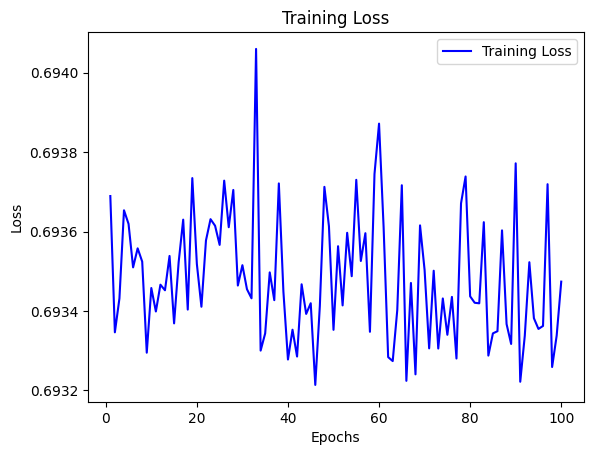

In [27]:
loss = history.history['loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Solution for Vanishing Gradient Problem


In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [29]:
model2 = Sequential()

model2.add(Dense(128, activation='relu', input_dim=18))
model2.add(Dropout(0.5))
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(1, activation='sigmoid'))

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model2.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

history2 = model2.fit(X_train_scaled, y_train, epochs=100, validation_data=(X_val_scaled, y_val), batch_size=32, callbacks=[early_stopping])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.5003 - loss: 0.7307 - val_accuracy: 0.5793 - val_loss: 0.6865
Epoch 2/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5107 - loss: 0.7026 - val_accuracy: 0.6245 - val_loss: 0.6825
Epoch 3/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5531 - loss: 0.6884 - val_accuracy: 0.6274 - val_loss: 0.6720
Epoch 4/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5227 - loss: 0.6968 - val_accuracy: 0.6288 - val_loss: 0.6644
Epoch 5/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5546 - loss: 0.6748 - val_accuracy: 0.6259 - val_loss: 0.6507
Epoch 6/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5979 - loss: 0.6673 - val_accuracy: 0.6507 - val_loss: 0.6344
Epoch 7/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6058 - loss: 0.6526 - val_accuracy: 0.6667 - val_loss: 0.6267
Epoch 8/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5958 - loss: 0.6472 - val_accuracy: 0.6783 -

In [30]:
predictions = model2.predict(X_val_scaled)
rounded_predictions = np.round(predictions)
report = classification_report(y_val, rounded_predictions)
print(f'Classification Report:\n{report}')

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.91      0.95       347
           1       0.91      0.99      0.95       340

    accuracy                           0.95       687
   macro avg       0.95      0.95      0.95       687
weighted avg       0.95      0.95      0.95       687

